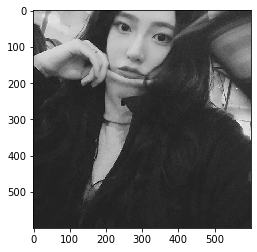

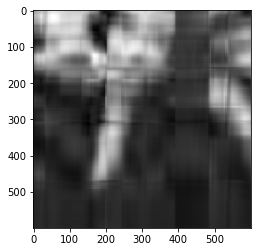

[[-37.43705006 -29.06448979 -13.00550217 ...  23.29925111  26.17428795
   32.68762107]
 [-43.7008274  -12.37202676 -15.34131571 ...  21.46969909  24.48357981
   28.06658242]
 [-18.55249019  -3.24552412 -25.2248163  ...  17.95608941  22.99725409
   20.5908464 ]
 ...
 [ -1.99811639  -1.84344141  -2.21868805 ...  10.25335618  10.09501645
    7.64095408]
 [ -1.96537533  -1.82475668  -2.20432431 ...   9.99045876   9.86336496
    7.43161624]
 [ -2.55458956  -2.44288419  -2.84593428 ...  10.5527488   10.45822405
    8.0120502 ]]


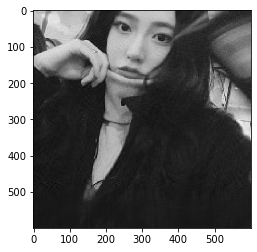

[[-22.05980262 -16.08104545   6.23915256 ...   0.19365192   0.77734784
    6.82743937]
 [-34.10673255  -4.67735979  -1.86030234 ...   0.3020518   -0.04495477
    2.91832486]
 [-18.60599155  -3.49808578 -17.97399889 ...   1.71188691   2.39853937
    0.55171796]
 ...
 [  1.13888617   1.8174848    1.35017299 ...   0.46654355   1.11496399
   -0.35382224]
 [ -0.03776517   0.94159332   0.60321195 ...   0.57359889   1.3657776
    0.78015255]
 [ -1.26705567  -0.53914441  -0.51787692 ...   1.45811178   0.89695872
    1.32156996]]


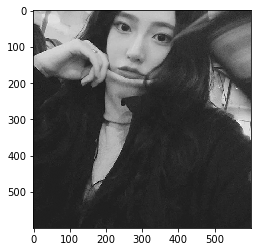

[[ 0.07176585 -0.14440735 -0.07692181 ...  0.30732055  0.20827104
  -0.06919044]
 [-0.50409732  0.3649899   0.0414927  ... -0.33295194 -0.37521204
  -0.04191467]
 [ 0.3111921   0.25777292 -0.33657437 ... -0.21035846  0.05177872
   0.15718368]
 ...
 [-0.39795322  1.2158526  -0.65432085 ...  0.25420366 -0.4045755
   0.28765439]
 [-0.35986578  1.13799955 -0.67729936 ...  0.1804773  -0.62990487
   0.67968417]
 [-0.38239393  0.5272062  -0.57638824 ...  0.42891812 -0.25183816
  -0.00920718]]


In [1]:
import numpy as np
from scipy.linalg import svd
from PIL import Image
import matplotlib.pyplot as plt

# 取前k个特征，对图像进行还原
def get_image_feature(s, k):
	# 对于S，只保留前K个特征值
	s_temp = np.zeros(s.shape[0])
	s_temp[0:k] = s[0:k]
	s = s_temp * np.identity(s.shape[0])
	# 用新的s_temp，以及p,q重构A
	temp = np.dot(p,s)
	temp = np.dot(temp,q)
	plt.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
	plt.show()
	print(A-temp)


# 加载600色图片,因为我用的彩色照片,所以需要转化为灰色矩阵
I = Image.open('C:/Users/Yan3/Desktop/dataset/beauty.bmp') 
L = I.convert('L') #感谢CSDN,这么简单就转化成功了,lol
A = np.array(L)

# 显示原图像
plt.imshow(A, cmap=plt.cm.gray, interpolation='nearest')
plt.show()
# 对图像矩阵A进行奇异值分解，得到p,s,q
p,s,q = svd(A, full_matrices=False)
# 当奇异值数量为原有的1%，10%，50%时，输出重构后的图像
get_image_feature(s,int(len(s)*0.01) )
get_image_feature(s,int(len(s)*0.1) )
get_image_feature(s,int(len(s)*0.5))